# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)

        weather_json = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | asayita
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | olafsvik
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | la ronge
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | chagda
City not found. Skipping...
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | rincon
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,22.09,94,20,1.03,TO,1680530657
1,busselton,-33.6500,115.3333,14.92,87,0,4.25,AU,1680530649
2,lavrentiya,65.5833,-171.0000,-15.63,97,100,2.23,RU,1680530658
3,thompson,55.7435,-97.8558,-22.91,77,100,3.09,CA,1680530658
4,bredasdorp,-34.5322,20.0403,21.86,52,65,7.50,ZA,1680530658


In [7]:
# Export the City_Data into a csv
# Had to ".." my path every time.
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
# Had to ".." my path every time.
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,22.09,94,20,1.03,TO,1680530657
1,busselton,-33.6500,115.3333,14.92,87,0,4.25,AU,1680530649
2,lavrentiya,65.5833,-171.0000,-15.63,97,100,2.23,RU,1680530658
3,thompson,55.7435,-97.8558,-22.91,77,100,3.09,CA,1680530658
4,bredasdorp,-34.5322,20.0403,21.86,52,65,7.50,ZA,1680530658


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

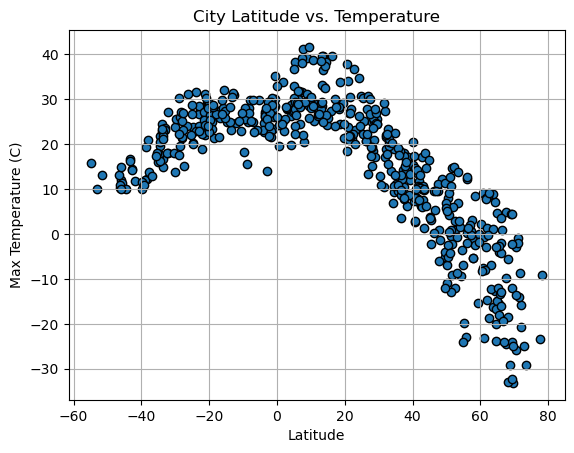

In [10]:
# Build scatter plot for latitude vs. temperature
# x, y
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
# Had to ".." my path every time.
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

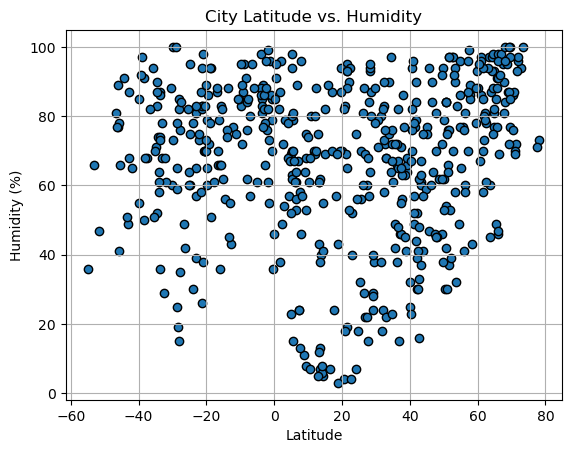

In [11]:
# Build the scatter plots for latitude vs. humidity
# x, y
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
# Had to ".." my path every time.
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

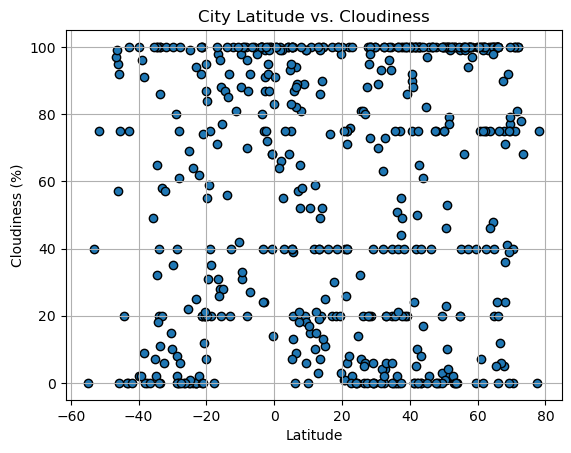

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# x,y 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
# Had to ".." my path every time.
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

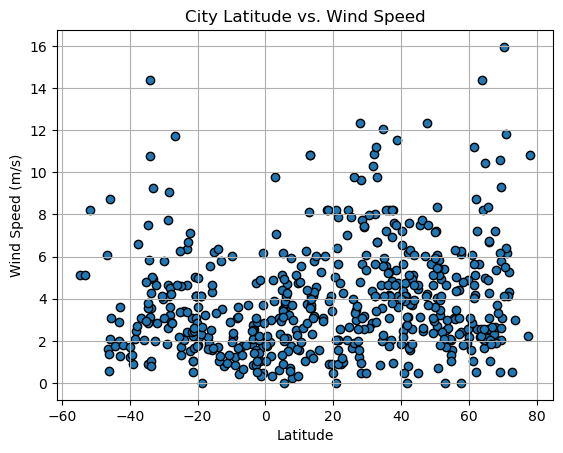

In [14]:
# Build the scatter plots for latitude vs. wind speed
#x, y
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
# Had to ".." my path every time.
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lavrentiya,65.5833,-171.0000,-15.63,97,100,2.23,RU,1680530658
3,thompson,55.7435,-97.8558,-22.91,77,100,3.09,CA,1680530658
5,kodiak,57.7900,-152.4072,-1.27,86,100,0.00,US,1680530658
8,olafsvik,64.8945,-23.7142,4.77,93,100,10.42,IS,1680530658
11,la ronge,55.1001,-105.2842,-19.86,65,40,1.54,CA,1680530373


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] <= 0])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,22.09,94,20,1.03,TO,1680530657
1,busselton,-33.6500,115.3333,14.92,87,0,4.25,AU,1680530649
4,bredasdorp,-34.5322,20.0403,21.86,52,65,7.50,ZA,1680530658
6,arraial do cabo,-22.9661,-42.0278,26.98,65,0,4.63,BR,1680530608
7,castro,-24.7911,-50.0119,20.31,60,0,1.71,BR,1680530658


In [18]:
# Define a function to create Linear Regression plots
def linreg(xvalues, yvalues, xlabels, ylabels):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")
    plt.annotate(line_eq,(6, 1),fontsize=10,color="red")
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.show()  

###  Temperature vs. Latitude Linear Regression Plot

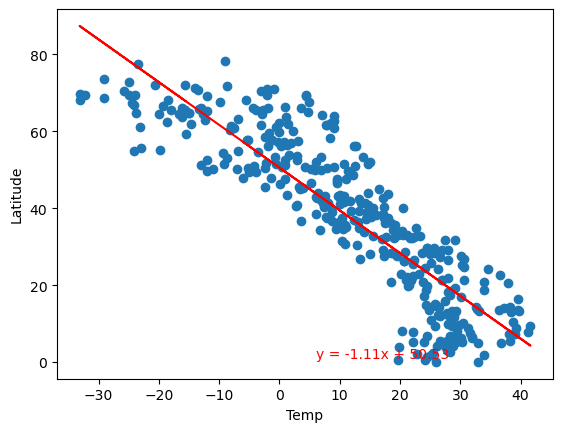

In [19]:
# Linear regression on Northern Hemisphere
#x, y
linreg(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], "Temp", "Latitude")

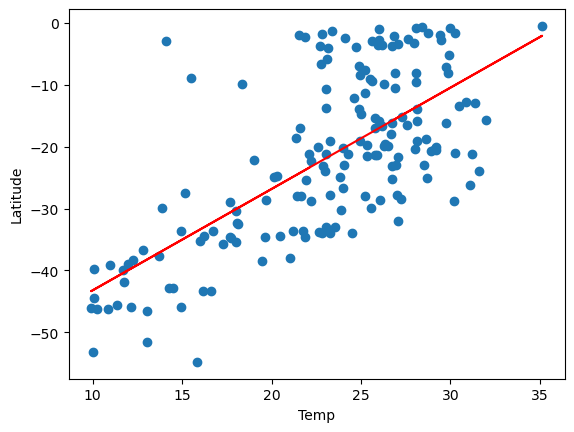

In [28]:
# Linear regression on Southern Hemisphere
#x, y
linreg(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"], "Temp", "Latitude")

**Discussion about the linear relationship:** The slope is negative here. The graphs indicate that if the latitude is closer to 0, the temperature will become warmer where it will be the opposite if the the distance of latitude is farther away. For the southern hemisphere, the closer the latitude is 0, the more temperature there is.

### Humidity vs. Latitude Linear Regression Plot

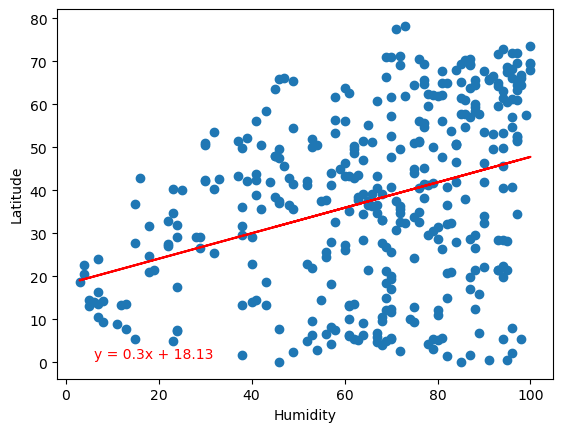

In [29]:
# Northern Hemisphere
#x, y
linreg(northern_hemi_df["Humidity"], northern_hemi_df["Lat"], "Humidity", "Latitude")

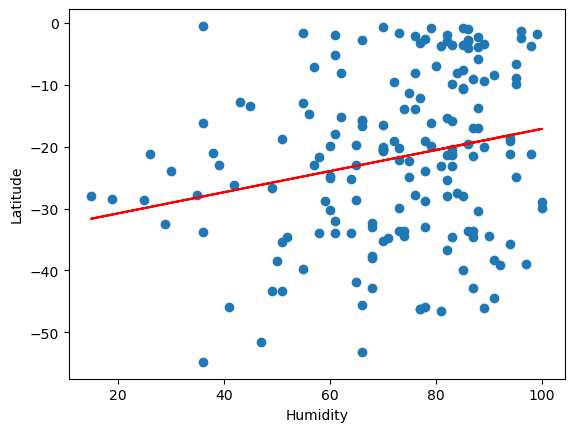

In [23]:
# Southern Hemisphere
#x, y
linreg(southern_hemi_df["Humidity"], southern_hemi_df["Lat"], "Humidity", "Latitude")

**Discussion about the linear relationship:** The slope is positive here. The graphs indicate, despite how the results are more varied here, that the more distance of latitude, the more humid it will get. However, in the Southern hemisphere, closer you are to 0 in regards to latitude, the more humid it is. Again, however, the results in the Southern hemisphere is definitely more varied. 

### Cloudiness vs. Latitude Linear Regression Plot

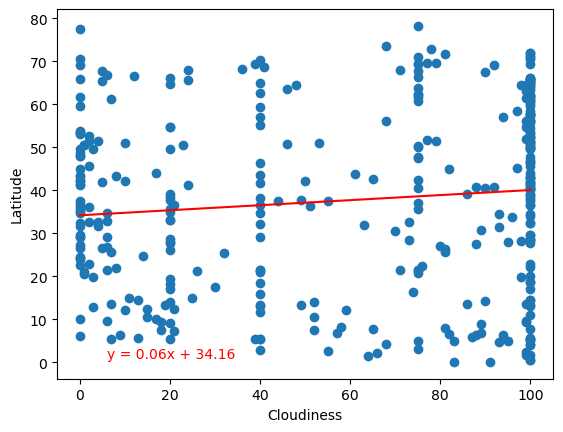

In [24]:
# Northern Hemisphere
#x, y
linreg(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"], "Cloudiness", "Latitude")

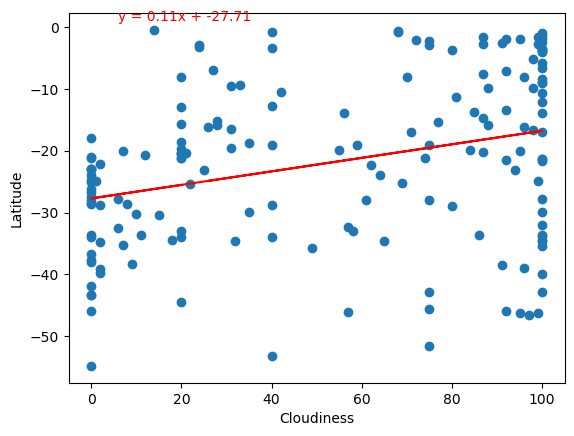

In [25]:
# Southern Hemisphere
#x, y
linreg(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"], "Cloudiness", "Latitude")

**Discussion about the linear relationship:** The slopes are positive here. The results here show that despite some varied results, it seems that some like one or the other side. In regards to the Northern hemisphere, the more the distance of latitude, the more cloudy it will get. However, it does seem that some places are very cloudy (at 100) despite the latitude distance. This is slightly similar for the southern hemisphere, where it will be more cloudy the closer you are to 0.

### Wind Speed vs. Latitude Linear Regression Plot

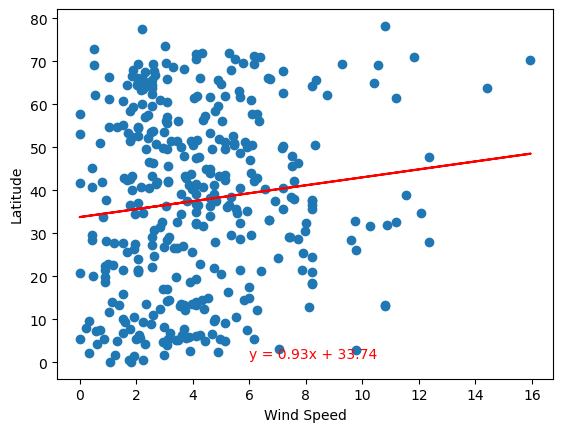

In [26]:
# Northern Hemisphere
#x, y
linreg(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"], "Wind Speed", "Latitude")

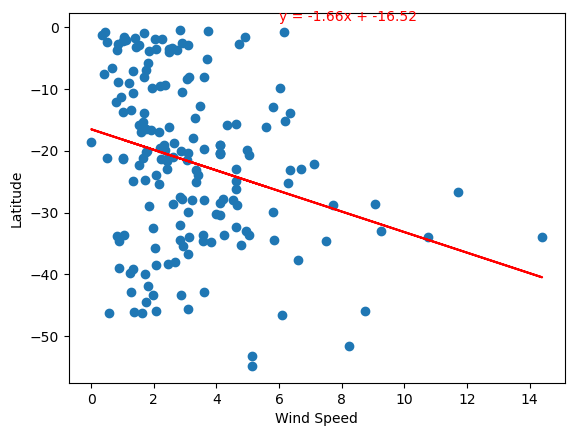

In [27]:
# Southern Hemisphere
#x, y
linreg(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"], "Wind Speed", "Latitude")

**Discussion about the linear relationship:** The northern hemisphere slope is positive while south is negative. This is showing that the farther from 0 in regards to latitude in the northern hemisphere, the more wind speed present. In the southern hemisphere, it seems as though wind speed is consistent at most latitude distance, however, there are still some outliers. 